### Exploratory Data Analysis
* Dataset : Student_Course_Selection_1516.xlsx
* Author : ByungJae Kang
* Date : 03/02/2018
* Objective : To briefly understand about the data
* Description
    1. Totally 100K student enrollments
    2. Important variables : RUI(Student ID), major(department), objective(degree or program), Term, units
    3. "Total units per semester VS Student count" shows similar distribution for same season.
    4. Too many majors and objectives: not easy to consider all.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'Student_Course_Selection_1516.xlsx'
data = pd.ExcelFile(file)

df = data.parse(data.sheet_names[0])

print(df.info())
print(df.describe())
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101376 entries, 0 to 101375
Data columns (total 14 columns):
Randomized Unique Identifier    101376 non-null int64
Major                           100839 non-null object
Class                           101376 non-null object
Owner                           100839 non-null object
Objective                       100839 non-null object
Term                            101376 non-null int64
Course                          101376 non-null object
Title                           101376 non-null object
Section                         101376 non-null int64
Instructor                      101224 non-null object
# Students                      101376 non-null int64
Units                           101376 non-null float64
Enroll                          101376 non-null object
Withdraw                        1845 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 10.8+ MB
None
       Randomized Unique Identifier           Term      

Randomized Unique Identifier
1001     9.0
1002    10.0
1011    30.0
1025    32.0
1052     2.0
Name: Units, dtype: float64


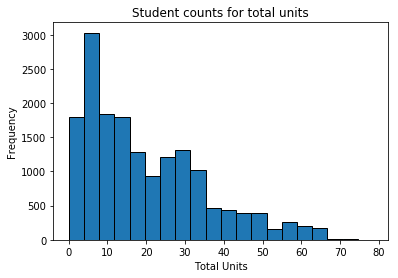

In [4]:
df1 = df.groupby(['Randomized Unique Identifier'])['Units'].sum()
print(df1.head())

df1.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Student counts for total units')
plt.xlabel('Total Units')
plt.show()

term 20161: mean 8.45, std 4.58, max 24.0, min0.0
term 20171: mean 8.57, std 4.47, max 24.0, min0.0
term 20162: mean 5.69, std 3.55, max 16.0, min0.0
term 20172: mean 5.63, std 3.54, max 15.0, min0.0
term 20153: mean 8.71, std 4.79, max 30.0, min0.0
term 20163: mean 8.61, std 4.78, max 27.0, min0.0


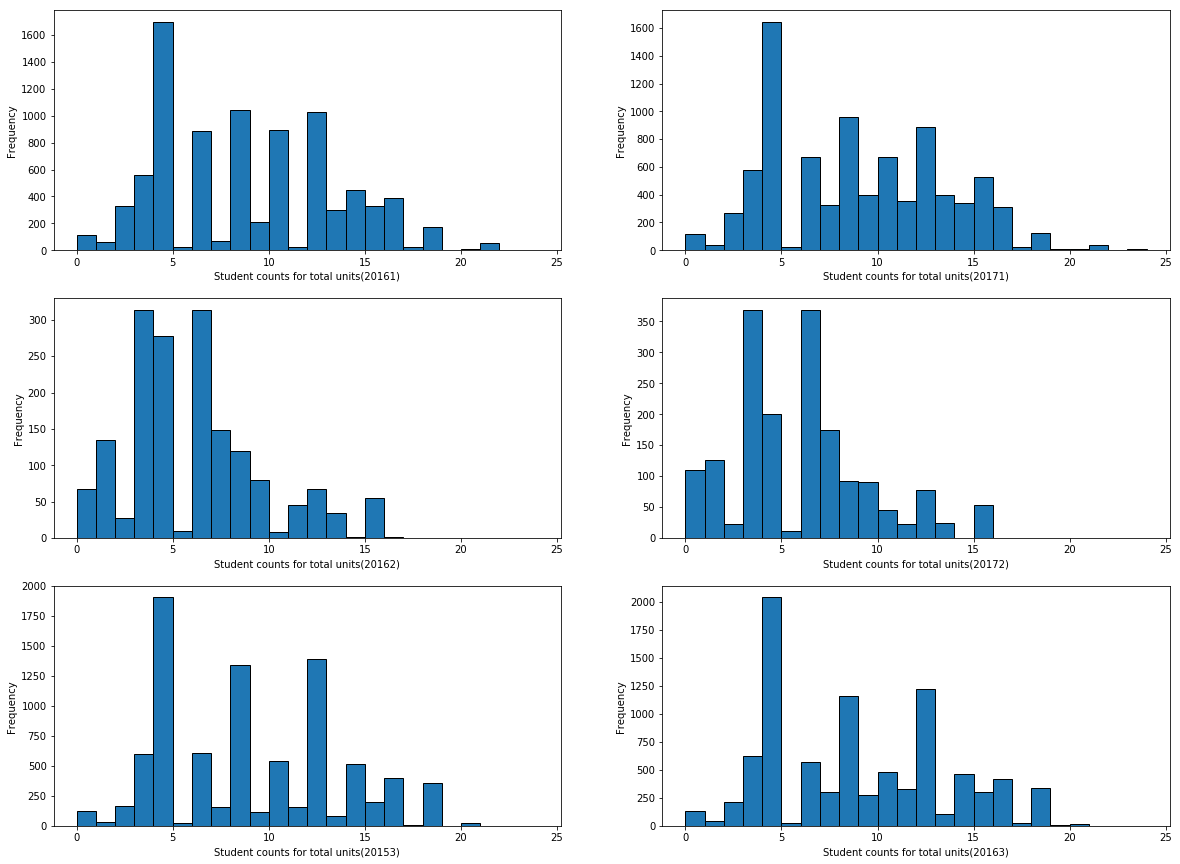

In [5]:
terms = sorted(df.loc[:,'Term'].unique())
terms = sorted(terms, key=lambda t: t % 10)

for term in terms:
    df1 = df.loc[df.loc[:,'Term']==term,:].groupby(['Randomized Unique Identifier'])['Units'].sum()
    print('term {}: mean {:.2f}, std {:.2f}, max {}, min{}'.format(term, df1.mean(), df1.std(), df1.max(), df1.min()))

i = 1
plt.figure(figsize=(20,15))
for term in terms:
    plt.subplot(3,2,i)
    df1 = df.loc[df.loc[:,'Term']==term,:].groupby(['Randomized Unique Identifier'])['Units'].sum()
    df1.plot(kind='hist', bins=range(25), edgecolor='black')
    plt.xlabel('Student counts for total units({})'.format(term))
    i += 1
plt.show()

In [6]:
#print(df.loc[:,'Major'].unique())
major_list = []
for major in df.loc[:,'Major'].unique().astype(str):
    lst = major.split(',')
    if len(lst)==1 :
        major_list.append(lst[0])
    else:
        for item in lst:
            major_list.append(item)
print('Number of Majors: {}'.format(len(set(major_list))))
print(set(major_list))

objective_list = []
for obj in df.loc[:,'Objective'].unique().astype(str):
    lst = obj.split(',')
    if len(lst)==1 :
        objective_list.append(lst[0])
    else:
        for item in lst:
            objective_list.append(item)
print('Number of Objectives: {}'.format(len(set(objective_list))))
print(set(objective_list))

Number of Majors: 288
{'BMEC', 'IRGE', 'GM', 'CNMG', 'MFE', 'EE', 'UPPA', 'PSYC', 'ANTH', 'EPAS', 'MKT', 'ART', 'LARC', 'CBG', 'BIOS', 'AHIS', 'CECS', 'LIS', 'ENGL', 'ANDA', 'SOWK', 'CPNS', 'GMCB', 'BISC', 'BCT', 'UNDL', 'CMAP', 'HMNP', 'OT', 'ENSH', 'MPHP', 'CLS', 'WST', 'ASE', 'MDBA', 'NLTX', 'ISIS', 'BRDJ', 'nan', 'HAHM', 'BFNB', 'MUPR', 'UNDE', 'AMDC', 'IAIE', 'ACAD', 'VPAS', 'IR', 'GSBA', 'LHCL', 'POIR', 'PPL', 'BIPY', 'MB', 'PHIL', 'ENVE', 'EECN', 'BME', 'ASTE', 'CHE', 'SSPY', 'DH', 'NPLM', 'CENG', 'JDBA', 'AMCM', 'ENE', 'CHEE', 'CSSE', 'HSPP', 'SUSB', 'BUAD', 'PSCI', 'GEOL', 'PMPL', 'HCDA', 'STRC', 'ARCS', 'IAPM', 'BAIE', 'MPCE', 'NIIN', 'CGSC', 'CRWT', 'BAJN', 'GLBH', 'AE', 'HCPL', 'MPVN', 'NGOS', 'LING', 'CMMG', 'HIST', 'MPPI', 'MATH', 'RGCA', 'KNSL', 'MPTN', 'MEPE', 'SUPP', 'FIN', 'BSET', 'UREP', 'TCCM', 'AEMT', 'EDCN', 'PHCS', 'PH', 'CHEM', 'BAPH', 'PTE', 'NEUR', 'FINE', 'BASW', 'BUAN', 'MEDB', 'CMOL', 'CEST', 'CXPT', 'ENTL', 'LNPS', 'MPBN', 'OSCM', 'PP', 'ENGR', 'MEEC', 'HB

['ACCT', 'BAEP', 'BUAD', 'BUCO', 'DSO', 'ECON', 'FBE', 'GSBA', 'MKT', 'MOR', 'WRIT']


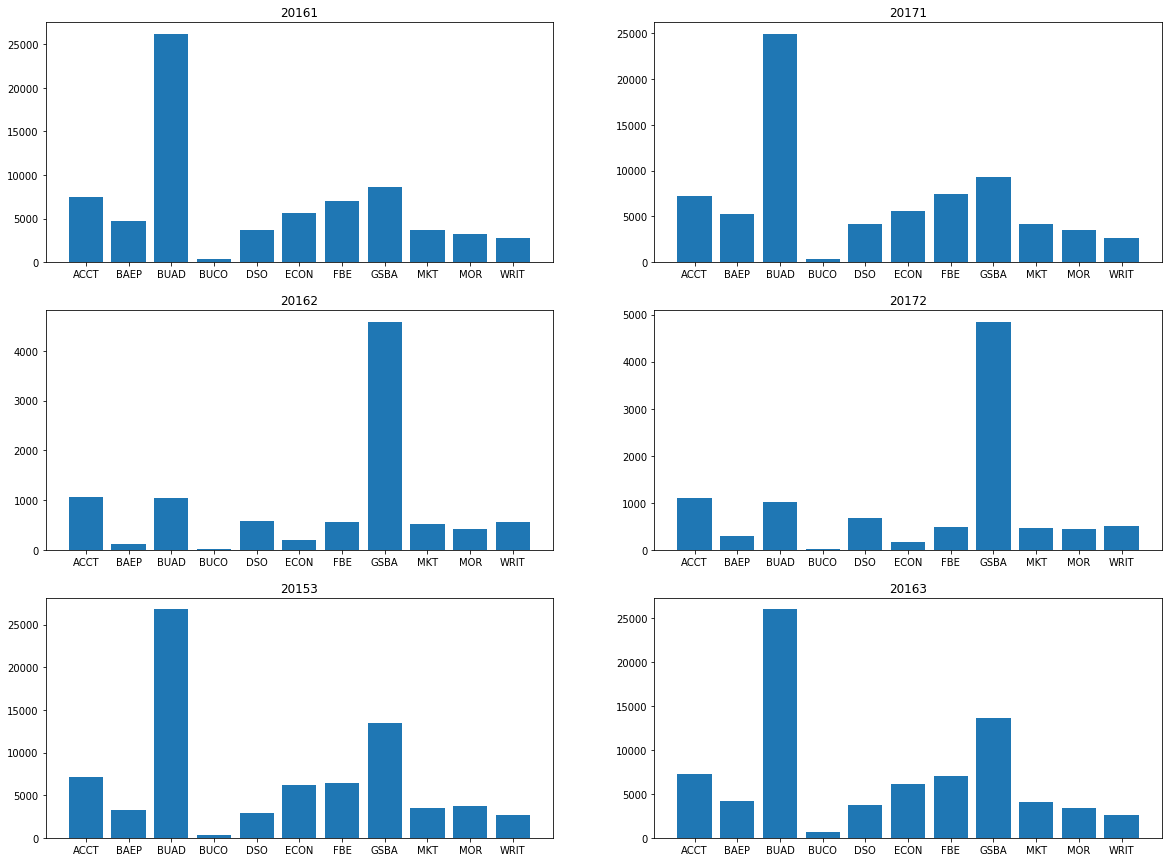

In [7]:
"""Data Cleaning"""
#Build Major as list
#Split Course
import numpy as np

df_cln = pd.concat([df, df['Course'].str.split('-', 1, expand=True)], axis=1)
df_cln = df_cln.rename(columns={0: 'Course_prefix', 1:'Course_suffix'})
df_cln['Major'] = df_cln['Major'].str.split(',')
df_cln = df_cln.groupby(['Randomized Unique Identifier','Term','Course_prefix'])[['Units']].sum()
df_cln = df_cln.groupby(level=[1,2]).sum().unstack(level='Term')

print(df_cln.index.tolist())

i=1
plt.figure(figsize=(20,15))
y_pos = np.arange(len(df_cln.index))
for term in terms:
    plt.subplot(3,2,i)
    plt.bar(y_pos,df_cln[('Units',term)])
    plt.xticks(y_pos, df_cln.index.tolist())
    plt.title(str(term))
    i += 1    
plt.show()

term 20161: mean 2.72, std 1.23, max 5, min0
term 20171: mean 2.69, std 1.21, max 6, min0
term 20162: mean 2.05, std 1.30, max 5, min0
term 20172: mean 2.02, std 1.31, max 5, min0
term 20153: mean 2.56, std 1.29, max 7, min0
term 20163: mean 2.70, std 1.22, max 5, min0


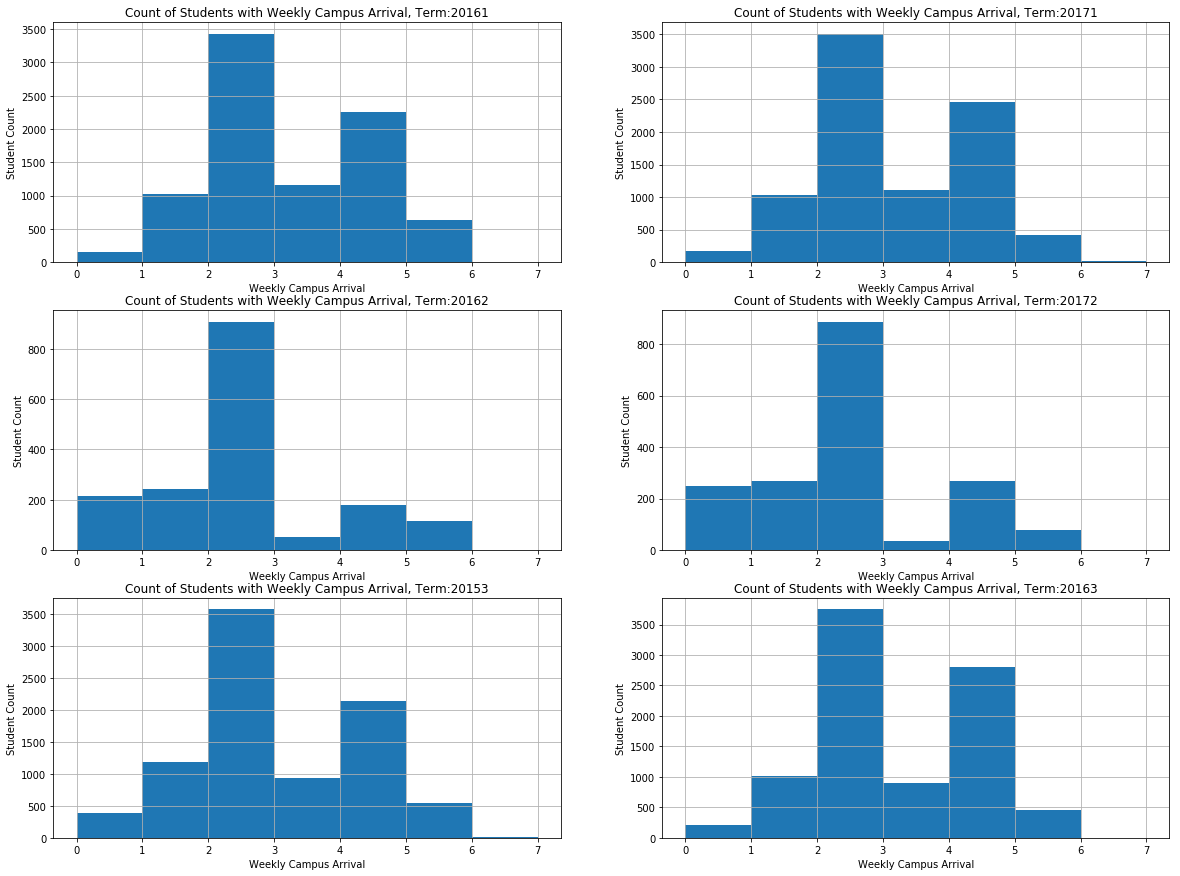

In [8]:
def agg_days(Series):
    days = ''
    for day in Series:
        try:
            for i in range(len(str(day))):
                if (day[i] not in days) and (day[i] in 'MTWHFSU'):
                    days += day[i]
        except:
            continue
    return len(days)

data = pd.ExcelFile('Marshall_Course_Enrollment_1516_1617.xlsx')
df_enroll = data.parse(data.sheet_names[0])

#Extract Course, Section, Term, First Days
#Join Tables
#Group by and aggregate
df_weekly_campus_arrival = (pd.merge(df.loc[:,['Randomized Unique Identifier', 'Course', 'Section', 'Term']],
                               df_enroll.loc[:,['Course', 'Section', 'First Days', 'Term']], how='left', 
                               left_on=['Term','Course','Section'], right_on = ['Term','Course','Section'])
                      .groupby(['Term','Randomized Unique Identifier'])['First Days'].agg(agg_days))

for term in terms:
    print('term {}: mean {:.2f}, std {:.2f}, max {}, min{}'.format(term,
                                                                   df_weekly_campus_arrival.loc[term].mean(),
                                                                   df_weekly_campus_arrival.loc[term].std(),
                                                                   df_weekly_campus_arrival.loc[term].max(),
                                                                   df_weekly_campus_arrival.loc[term].min()))

i=1
plt.figure(figsize=(20,15))
for term in terms:
    plt.subplot(3,2,i)
    df_weekly_campus_arrival.loc[(term)].hist(bins=range(8))
    plt.xlabel('Weekly Campus Arrival')
    plt.ylabel('Student Count')
    plt.title('Count of Students with Weekly Campus Arrival, Term:{}'.format(term))
    i += 1    
plt.show()

